# Unsupervised Models - Performance Metrics

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [2]:
df = pd.read_csv('UberEdited.csv')
df.head()

,Unnamed: 0,index,Unumber,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,distance_range
0,0,129546,4264204,2013-10-11 20:42:00.000000209,13.50,2013-10-11 20:42:00 UTC,-73.968367,40.755280,-74.000925,40.731782,1,3.705146,4.0
1,1,157708,16914374,2009-05-22 22:56:00.000000207,28.25,2009-05-22 22:56:00 UTC,-73.871200,40.773960,-73.996203,40.759870,1,13.958072,10000.0
2,2,146825,274789,2011-02-28 06:56:44.0000002,6.90,2011-02-28 06:56:44 UTC,-73.996791,40.737605,-73.977832,40.763559,1,2.261968,3.0
3,3,192482,11942062,2015-01-04 17:04:31.0000004,39.33,2015-01-04 17:04:31 UTC,-73.873100,40.774040,-73.985306,40.732552,1,12.588475,10000.0
4,4,187756,42996243,2014-04-27 12:59:00.000000182,14.50,2014-04-27 12:59:00 UTC,-73.956453,40.771052,-73.991773,40.749097,1,3.999675,4.0


In [3]:
df = df.drop(columns=['index','Unumber','key','pickup_datetime','distance_range'])

In [4]:
target = df.fare_amount

In [5]:
# Specify the number of clusters
n_clusters = 2
# Initialize the Means object
kmeans = KMeans(n_clusters=n_clusters)
# Fit the KMeans object to the data
kmeans.fit(df)
# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

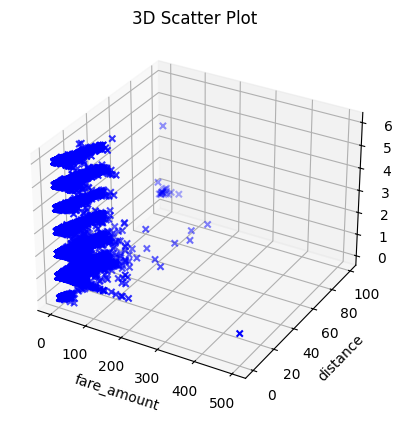

In [6]:
fig = plt.figure()
ax = fig.add_subplot (111, projection='3d')
# Plot the data points
ax.scatter (df.fare_amount, df.distance, df.passenger_count, marker='x', c='b')
# Set the axis labels
ax.set_xlabel('fare_amount')
ax.set_ylabel ('distance')
ax.set_zlabel ('passenger_count')
# Set the title
plt.title("3D Scatter Plot")
# Show the plot
plt.show ()

# Extrinsic Measure

In [7]:
from sklearn.metrics.cluster import adjusted_rand_score
labels_true = target.values
labels_pred = labels
print(adjusted_rand_score(labels_true, labels_pred))

-2.793249308261164e-06


c:\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


In [8]:
from sklearn.metrics import mutual_info_score
print(mutual_info_score (labels_true, labels_pred))

0.004739438327830596


c:\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


# Intrinsic Measures

In [9]:
from sklearn.metrics import silhouette_score
print(silhouette_score(df, labels))

0.6267186669311904
